In [1]:
import os
import bye_cycle
from tqdm import tqdm
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import sys
import json
import pickle

In [2]:
# This is used to pre-process battery data and has been commented out. We just load CACHED_DATA here genereated from this cell.

# read CACHED data 
# excluding all diagnostic cycles and those with increase in discharge cap, renumber 
# input_window_size = 100
# output_window_size = 25
# skip_window_after_diagnostic = 50
# structured_data_list = []
# summary_data_list = []
# nominal_cell_capacity = 1.1
# drop_following_diagnostic = False

# for i,cell_file in enumerate(tqdm(os.listdir('../examples/CACHED_DATA/pre_processed_pandas/LFP/'))):
#     print(i, cell_file)
#     if cell_file.startswith("Fast"):
#         with open(f'../examples/CACHED_DATA/pre_processed_pandas/LFP/{cell_file}', 'rb') as f:
#             structured_data, summary_data = pickle.load(f)
#         structured_data = structured_data[1:]
#         # dropping first cycle
#         summary_data[0] = summary_data[0].iloc[1: , :]
#         if not drop_following_diagnostic:
#             cycle_indices_dropped = []
#         else:
#             summary_data[0], cycle_indices_dropped = decrease_monotonically(summary_data[0])

#         # check if the cell has enough cycles based on the $window_cycles_size
#         if len(summary_data[0]) >= input_window_size * 1.2:
#             cycle_list = []
#             new_cycle_indices = []
#             j = 0
#             for i, cycle in enumerate(structured_data):
                
#                 # drop first cycle
#                 cycle_copy = cycle.tail(cycle.shape[0]-1).copy()
#                 if len(cycle_copy) > 2 and np.unique(cycle_copy['cycle_index']) !=0:
#                     cycle_copy['cycle_index'] = cycle_copy['cycle_index'].subtract(1)

#                     cycle_list.append(cycle_copy)

#             structured_data_list.append(cycle_list)
#             summary_data_list.append(summary_data[0])
#         else:
#             print(f'NUMBER OF CYCLES THRESHOLD ALEERT FOR {i, cell_file}')
# print('CACHED data is loaded.')

In [3]:
# def index_convoluter(cell, input_window_size=20, output_window_size=20, overlap_cycle_window=False,
#                      overlap_size=5, skip_diagnostic_in_window=False):
#     '''This function generates a nested list of indices by convolting the cycles based on cycle_window_size. 
#         You can choose to have your window of cycles overlap, or skipp the windows that involve diagnostic cycles in between.
#     '''
#     max_cycle_index = len(cell) #30 #
#     print(max_cycle_index)
#     if input_window_size < overlap_size:
#         raise ValueError(f'If overlapping, overlap_size ({overlap_size}) should be samller than cycle_window_size ({input_window_size}). Please check inputs.')
#     if not input_window_size < max_cycle_index:
#         raise ValueError(f'cycle_window_size ({input_window_size}) should be samller than maximum number of cycles in cell ({max_cycle_index}). Please check inputs.')
#     if overlap_cycle_window:
#         non_overlap =  input_window_size - overlap_size
#     else:
#         non_overlap = input_window_size
#     intervals = range(0, max_cycle_index, non_overlap)
#     if not skip_diagnostic_in_window:
#         input_covolutions = [list(range(x, x + input_window_size)) for x in intervals if x <= max_cycle_index-input_window_size]
#     else:
#         skipped_indices = find_renumbedred_index(cell)
#         input_covolutions = [list(range(x, x + input_window_size)) for x in intervals if x <= max_cycle_index-input_window_size
#                              and not (set(list(range(x, x + cycle_window_size))[:-1]) & set(skipped_indices))]
#     output_covolutions = [list(range(x[-1]+1, x[-1] + output_window_size +1)) for x in input_covolutions if x[-1] < max_cycle_index- output_window_size]
        
#     return input_covolutions[:len(output_covolutions)], output_covolutions


# def find_slope(cycle_window_label):
#     mid_window_index = len(cycle_window_label)//2
#     low = np.array(cycle_window_label)[0]
#     mid = np.array(cycle_window_label)[mid_window_index]
#     high = np.array(cycle_window_label)[-1]
# #     print(low[0], mid[0], high[0])
#     slope_1 = (mid[1] - low[1]) / (mid[0] - low[0]) # mid_window_index #
#     slope_2 = (high[1] - mid[1]) / (mid[0] - low[0]) # mid_window_index
#     return slope_1, slope_2

# pkl_f_l_filename = f'../examples/CACHED_DATA/pickled_cycle_windows/LFP/fearures_labels_inputs_window_{input_window_size}_outputs_window_{output_window_size}.pkl'

# if os.path.exists(pkl_f_l_filename):

#     skip_diagnostic_in_window = False

#     features_columns = ['cycle_index','voltage', 'current']
#     label_columns = ['cycle_index', 'discharge_capacity']
#     monitored_cycles_discharge_capacity = []
#     labels = np.empty([0, 2])
#     cell_features = []
#     cell_labels = []
#     cell_discharge_caps = []
#     initial_discharge_cap_windows = []
#     for i, cell in enumerate(tqdm(structured_data_list)):
#         if len(cell)!=0:
#             cycle_window_features = []
#             cycle_window_labels = []
#             initial_discharge_cap = []
#             cell_cycle_indices = summary_data_list[i]['cycle_index'].values
#             input_covolutions, output_covolutions  = index_convoluter(cell, overlap_cycle_window=False, 
#                                                  overlap_size=2, input_window_size=input_window_size,
#                                                                       output_window_size=output_window_size,
#                                                            skip_diagnostic_in_window=skip_diagnostic_in_window)
#             for j, (input_index_list, output_index_list) in enumerate(zip(input_covolutions, output_covolutions)):
#                     cycle_window_features.append(list(zip(*[(bye_cycle.interpol_cycle(cell[cycle_index], columns=features_columns, n_points=100)
#                                                              , len(cell[cycle_index]))
#                                          for cycle_index in input_index_list])))
#                     discharge_cap_cycle_window = np.array(summary_data_list[i][label_columns])[output_index_list]
# #                     discharge_cap_cycle_window = np.array(summary_data_list[i][label_columns])[input_index_list]
#                         # This for getting the Ground-truth pkl file.

#                     cycle_window_labels.append(list([find_slope(discharge_cap_cycle_window), discharge_cap_cycle_window]))
#             cell_features.append(cycle_window_features)
#             cell_labels.append(cycle_window_labels)
#     with open(pkl_f_l_filename, 'wb') as f:
#         pkl.dump([cell_features, cell_labels], f)
# else:
#     print('Loaded CACHED pickled files for features and labels.')
#     with open(pkl_f_l_filename, 'rb') as f:
#         [cell_features, cell_labels] = pkl.load(f)  

In [4]:
def make_feature_arrays(data):
    X_dt_values = []
    X_time_series = []
    for X in data:
        X_dt_values.append(X[1])
        X_time_series.append(X[0])
#         break
    return np.array(X_time_series), np.array(X_dt_values)

def make_label_arrays(data):
    slopes = []
    discharge_cap = []
    for Y in data:
        discharge_cap.append(Y[1])
        slopes.append(Y[0])
    return np.array(discharge_cap), np.array(slopes)

In [5]:
def load_data (pkl_file, test_cell_number=0, seed=0, train_size=0.9, val_size=0.2 ):
    with open(pkl_file, 'rb') as f:
        [cell_features, cell_labels] = pkl.load(f)  
    import random
    prepared_data = list(zip(cell_features, cell_labels))
    random.seed(seed)
    shuffled_indices = list(range(len(prepared_data)))
    random.shuffle(prepared_data)
    N_train = int(train_size *len(prepared_data))
    N_val = int(val_size * N_train)
    train_cells = prepared_data[:N_train]
    test_cells = prepared_data[N_train:]
    val_cells = train_cells[:N_val]
    train_cells = train_cells[N_val:]
    tested_cell = [test_cells[test_cell_number]]
    X_tested_cell = [x for cycle in tested_cell for x in cycle[0]]
    Y_tested_cell = [y for cycle in tested_cell for y in cycle[1]]
    dc_tested_cell, slopes_tested_cell = make_label_arrays(Y_tested_cell)
    X_tested_cell_time_series, X_tested_cell_dt = make_feature_arrays(X_tested_cell)

    all_test_slopes = [y[0] for y in Y_tested_cell]
    all_test_dc = np.array([y[1] for y in Y_tested_cell])

    all_ground_truth_dc = all_test_dc[:,:,1]
    all_ground_truth_cycle_index = all_test_dc[:,:,0]
    return all_ground_truth_cycle_index, all_ground_truth_dc


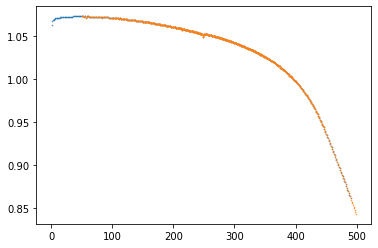

In [334]:
input_window_size = 50
output_window_size =200
test_cell_number = 13

pkl_all_gc_filename = f'../examples/CACHED_DATA/pickled_cycle_windows/LFP/Ground_truth_DC_all.pkl'
all_cycle_index_gc, all_dc_gc = load_data(pkl_all_gc_filename, test_cell_number=test_cell_number, seed=0)

pkl_f_l_filename = f'../examples/CACHED_DATA/pickled_cycle_windows/LFP/fearures_labels_inputs_window_{input_window_size}_outputs_window_{output_window_size}.pkl'
output_cycle_index_gc, output_dc_gc = load_data(pkl_f_l_filename, test_cell_number=test_cell_number, seed=0)

plt.scatter(all_cycle_index_gc.flatten(),all_dc_gc.flatten(), s=0.2)
plt.scatter(output_cycle_index_gc.flatten(), output_dc_gc.flatten(), s=0.2)


In [335]:
class naive_model:
    def __init__(self, all_cycle_index, all_dc, degree=1):
        self.all_ground_truth_dc = all_dc
        self.all_ground_truth_cycle_index = all_cycle_index
        self.degree = degree
        
    def map_ground_truth_discharge_capacity(self, ground_truth_cycle_index,
                                        ground_truth_dc,
                                        cycles_index):
        ground_truth_input = []
        for i in cycles_index:
            if i == 0:
                i=1
            index = np.where(ground_truth_cycle_index==i)
            ground_truth_input.append(ground_truth_dc[index][0])
        return np.array(ground_truth_input)
    
    def fit(self, output_cycles, input_window_size=50):
        input_x = np.arange(output_cycles[0]-input_window_size, output_cycles[0])#[:len(output_cycles)] #+ window_number*input_window_size
#         print(f'\ninput_x: {input_x}')
#         print(f'\n{self.map_ground_truth_discharge_capacity(self.all_ground_truth_cycle_index,
#                                                                        self.all_ground_truth_dc,
#                                                                        input_x)})
        poly = np.polyfit(input_x, self.map_ground_truth_discharge_capacity(self.all_ground_truth_cycle_index,
                                                                       self.all_ground_truth_dc,
                                                                       input_x),
                                                                    deg=self.degree)
        new_y  = np.polyval(poly, output_cycles)
        return new_y

Text(0.5, 1.0, 'Input size: 50, Output size: 200, RMSE: 0.0331')

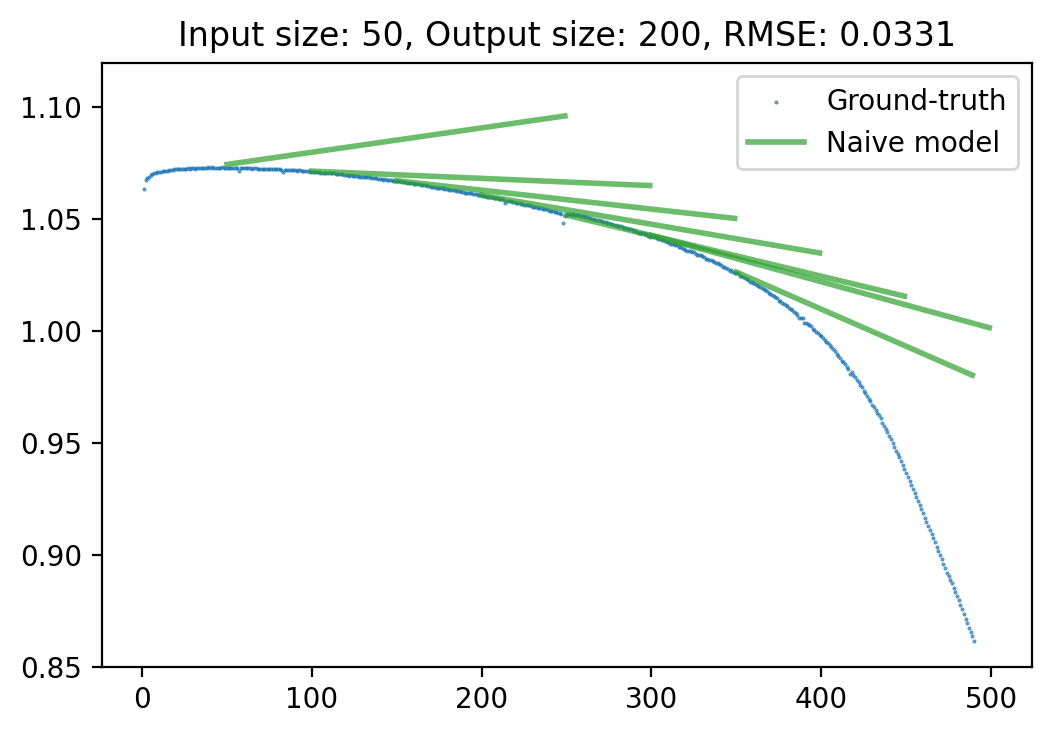

In [336]:
model = naive_model(all_cycle_index_gc, all_dc_gc)

all_predicted_dc = []
all_actual_dc = []
plt.figure(dpi=200)
m = len(output_cycle_index_gc)
for k in range(len(output_cycle_index_gc)):
    if k == 0:
        plt.scatter(all_cycle_index_gc, 
                        all_dc_gc,
                        label='Ground-truth'if k == 0 else "", color='C0', s=0.2, alpha=0.8)
    extrapolated_dc = model.fit(output_cycle_index_gc[k], input_window_size=input_window_size)
    all_predicted_dc.append(extrapolated_dc)
    all_actual_dc.append(output_dc_gc[k])
    plt.plot(output_cycle_index_gc[k], extrapolated_dc, color= 'C2', label='Naive model' if k == 0 else "", linewidth=2, alpha=0.7)
    last = output_cycle_index_gc[-1] + input_window_size

    if k == m-1 and last[0]<all_cycle_index_gc[-1][-1]:
        

        final_cycle_length = int(all_cycle_index_gc[-1][-1]-last[0])
        final_cycle_index = last[:final_cycle_length]

        last_extrapolated_dc = model.fit(final_cycle_index, input_window_size=input_window_size)#[:final_cycle_length]
        plt.plot(final_cycle_index, last_extrapolated_dc,
                 color= 'C2', label='Naive model' if k == 0 else "", linewidth=2, alpha=0.7)
        last_extrapolated_dc = last_extrapolated_dc.tolist() +[0] * (output_window_size - len(last_extrapolated_dc))
        last_actual_dc = all_dc_gc.flatten()[-final_cycle_length:].tolist()
        last_actual_dc = last_actual_dc +[0] * (output_window_size - len(last_actual_dc))
        all_predicted_dc.append(last_extrapolated_dc)
        all_actual_dc.append(last_actual_dc)


        

    
all_predicted_dc = np.array(all_predicted_dc)
all_actual_dc = np.array(all_actual_dc)
plt.ylim([0.85,1.12])
plt.legend()
dc_rmse = np.sqrt(((all_predicted_dc.reshape(-1,1) - all_actual_dc.reshape(-1,1))**2).mean())

plt.title(f'Input size: {input_window_size}, Output size: {output_window_size}, RMSE: {dc_rmse:.4f}')


In [337]:
import pandas as pd
input_window_sizes = [10,25,50,75, 100]
output_window_sizes = [10,25,50,75, 100, 125, 150, 175, 200]

all_RMSE = []
for m in input_window_sizes:
    for n in output_window_sizes:
        input_window_size = m
        output_window_size = n
        RMSE_file = f'../paper/CACHED_DATA/naive_model/LFP/RMSE_test_cells_{input_window_size}_outputs_window_{output_window_size}.json'
        with open(RMSE_file) as json_file:
            data = json.load(json_file)
        all_RMSE.append(data)

df = pd.json_normalize(all_RMSE)

<Figure size 1200x800 with 0 Axes>

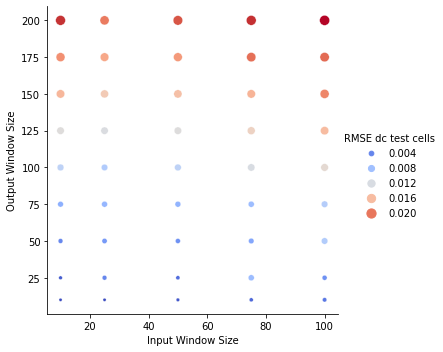

In [338]:
import seaborn as sns
plt.figure(dpi=200)
sns.relplot(
    data=df,
    x='Input Window Size', y='Output Window Size',
    size='RMSE dc test cells', sizes=(10, 100),
    hue='RMSE dc test cells',
    palette='coolwarm',
)

(5.0, 205.0)

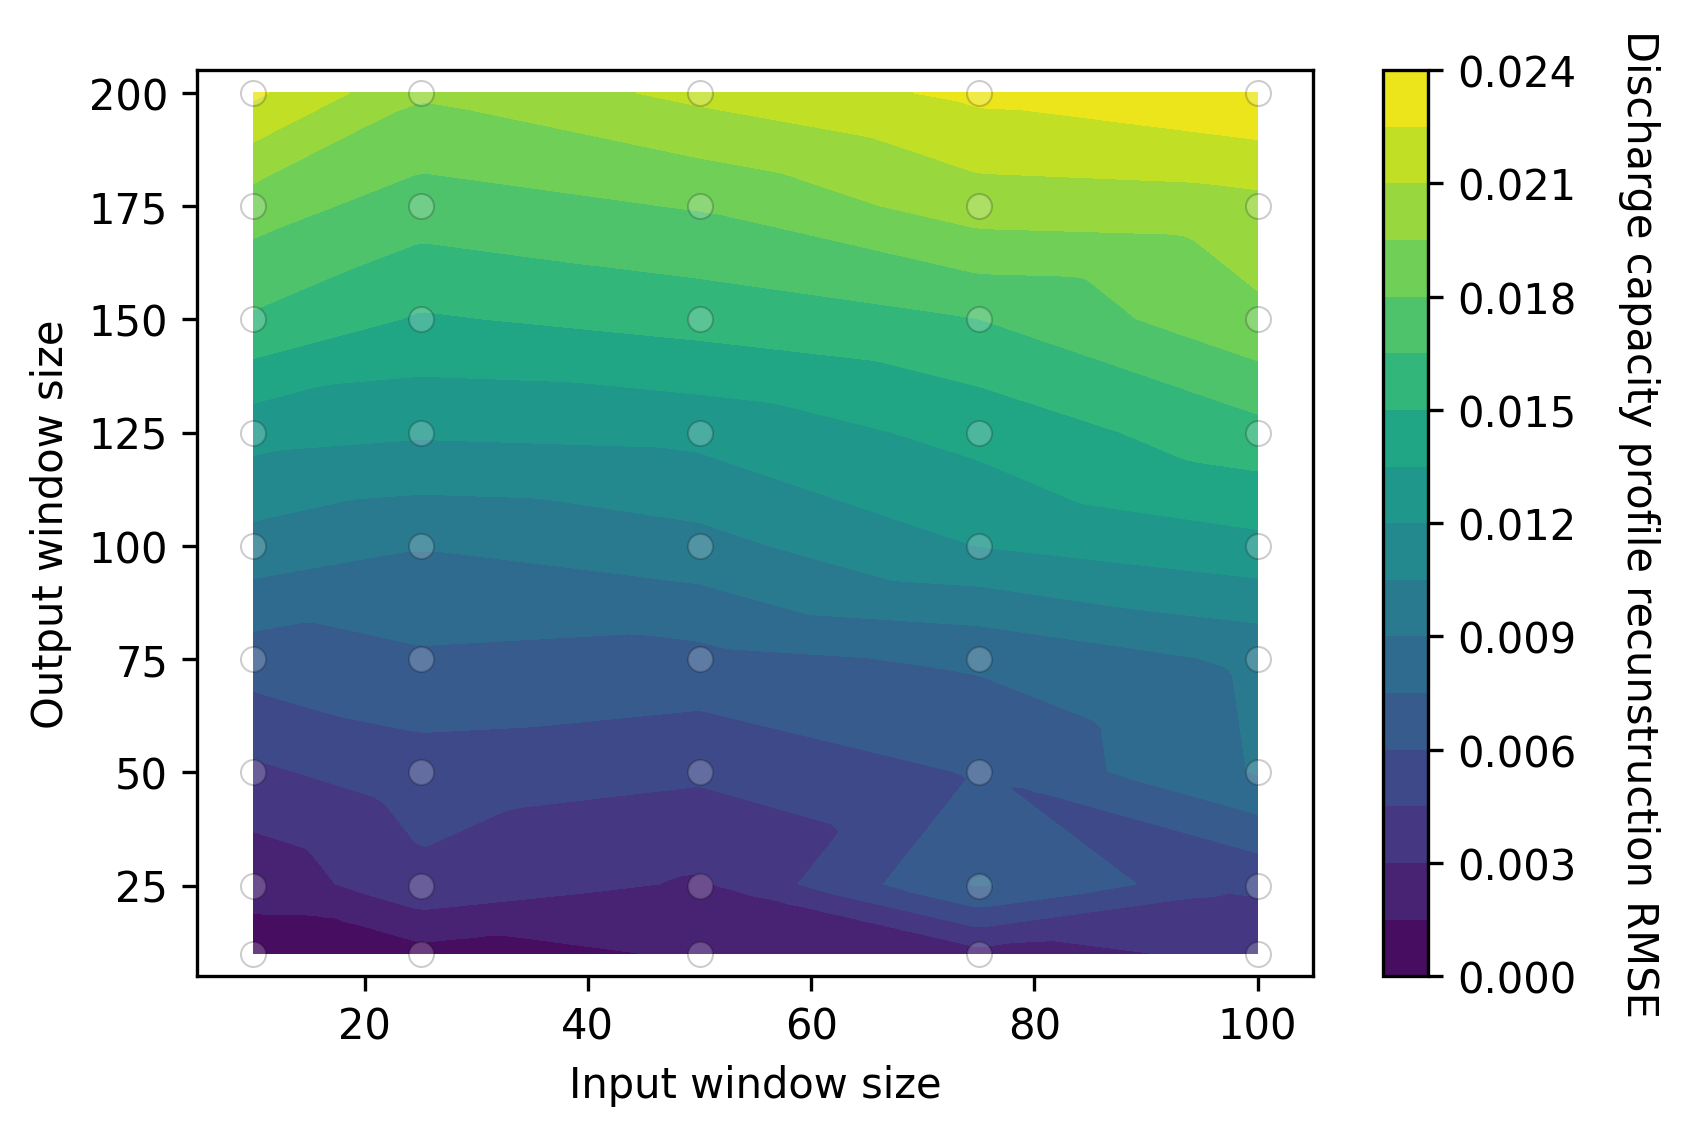

In [339]:
import scipy.stats as sps
xmin = 10
xmax = 100
ymin = 10
ymax = 200
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
fig, ax = plt.subplots(dpi=300)

from scipy.interpolate import griddata
npts = 15
px, py = np.random.choice(df['Input Window Size'], npts), np.random.choice(df['Output Window Size'], npts)
Ti = griddata((df['Input Window Size'], df['Output Window Size']),df['RMSE dc test cells'], (X, Y), method='linear')
im = ax.contourf(X, Y, Ti, levels=npts)

sns.scatterplot(
    data=df,
    x=df['Input Window Size'], y=df['Output Window Size'],
#     size=df['RMSE dc test cells']
    ax=ax,
    color='white',
    edgecolor='k',
    alpha=0.2
)

cbar = fig.colorbar(im, orientation='vertical')
# cbar.set_label('RMSE', rotation=0, y=1.02, x=-1)
cbar.set_label('Discharge capacity profile recunstruction RMSE', rotation=270, labelpad=20)

ax.set_xlabel('Input window size')
ax.set_ylabel('Output window size')
ax.set_xlim([xmin-5, xmax+5])
ax.set_ylim([ymin-5, ymax+5])
# plt.savefig(f'CACHED_DATA/naive_model/LFP/img/naive_model_RMSE.png', dpi=400, transparent=False)


In [17]:
def drop_duplicates(cycle_index, discharge_capacity):
    dc_traj = np.array(list(zip(cycle_index.flatten(), discharge_capacity.flatten())))
    _, indices = np.unique(dc_traj[:, 0], return_index=True)
    return dc_traj[indices]